In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/03. best_sandwitches_list_chicago.csv', encoding='UTF-8', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [3]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//cloud.typography.com" rel="dns-prefetch"/>
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"
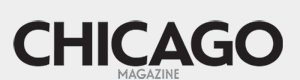

In [4]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, 'html.parser')
soup_tmp

In [5]:
print(soup_tmp.find('p','addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


In [6]:
price_tmp = soup_tmp.find('p','addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [7]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [8]:
from tqdm import tqdm_notebook

In [9]:
price = []
address = []

for n in df.index[:3]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p','addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))
    
    

In [10]:
price = []
address = []

for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p','addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))
    
    

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [11]:
price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [12]:
address

['2109 W. Chicago Ave.,',
 '800 W. Randolph St.,',
 '445 N. Clark St.,',
 '914 Noyes St., Evanston,',
 '825 W. Fulton Mkt.,',
 '100 E. Walton',
 '1639 S. Wabash Ave.,',
 '2211 W. North Ave.,',
 '3619 W. North Ave.,',
 '3267 S. Halsted St.,',
 '2537 N. Kedzie Blvd.,',
 'Multiple',
 '3124 N. Broadway,',
 '3455 N. Southport Ave.,',
 '2657 N. Kedzie Ave.,',
 '1120 W. Grand Ave.,',
 '1141 S. Jefferson St.,',
 '333 E. Benton Pl.,',
 '1411 N. Wells St.,',
 '1747 N. Damen Ave.,',
 '3209 W. Irving Park',
 'Multiple',
 '5347 N. Clark St.,',
 '2954 W. Irving Park Rd.,',
 'Multiple',
 '191 Skokie Valley Rd., Highland Park,',
 'Multiple',
 '1818 W. Wilson Ave.,',
 '2517 W. Division St.,',
 '218 W. Kinzie',
 'Multiple',
 '1547 N. Wells St.,',
 '415 N. Milwaukee Ave.,',
 '1840 N. Damen Ave.,',
 '1220 W. Webster Ave.,',
 '5357 N. Ashland Ave.,',
 '1834 W. Montrose Ave.,',
 '615 N. State St.,',
 'Multiple',
 '241 N. York Rd., Elmhurst,',
 '1323 E. 57th St.,',
 '655 Forest Ave., Lake Forest,',
 'Hotel L

In [11]:
df['Price'] = price
df['Address'] = address

df = df.loc[:, ['Rank', 'Cafe', 'Menu', 'Price','Address']]
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [12]:
df.to_csv('../data/03. sandwitches_list_chicago2.csv', sep=',', encoding='UTF-8')

In [13]:
import folium
import googlemaps
import numpy as np

In [14]:
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [15]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Cicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
        
    else:
        lat.append(np.nan)
        lng.append(np.nan)

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [16]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,",41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,",41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,",41.890618,-87.630933
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,",41.886566,-87.648575


In [17]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=11)
folium.Marker([df['lat'].mean(), df['lng'].mean()], popup='center').add_to(mapping)
mapping

In [18]:
for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], popup=df['Cafe'][n]).add_to(mapping)

In [19]:
mapping